In [15]:
% of certainty

i want null / no sign / shape / type

must make CNN from scratch e.g. like program each layer

SyntaxError: invalid syntax (3809379743.py, line 3)

In [1]:
import tensorflow as tf
import numpy as np
np.object = np.object_
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print(tf.config.list_physical_devices('GPU'))

2024-04-28 21:40:42.410467: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Num GPUs Available:  0
[]


<div style="width:100%; text-align: center; padding: 20px; background-color: #333; border-radius: 10px;">
    <h1 style="color:#7D3C98; font-size: 48px;"><strong>Assignment 2</strong></h1>
    <h2 style="color:#7D3C98;">Major Project</h2>
    <h2 style="color:#7D3C98;"><strong>COSC2673</strong> Machine Learning</h2>
    <h3 style="color:#D2B4DE; margin-top: 20px;">(Undergraduate Level)</h3>
    <h3 style="background: linear-gradient(to right, #7D3C98, #D7BDE2); -webkit-background-clip: text; color: solid;">By Oisin Aeonn & Vince Quach</em></h3>
    <h4 style="color:#BB8FCE;">Student IDs: s3952320 & s3900481</h4>
</div>

<div style="width:100%; text-align: center; padding: 20px; background-color: #333; border-radius: 10px;">
    <h1 style="color:#7D3C98; font-size: 36px;">1.3 Python Library Imports</h1>

In [3]:
# Operating system interfaces
import os

# Data manipulation and analysis
import pandas as pd

# Model selection and evaluation
from sklearn.model_selection import train_test_split

# Image preprocessing and augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Building sequential models
from tensorflow.keras.models import Sequential

# Layers for building neural networks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Plotting and visualization
import matplotlib.pyplot as plt

# Interactive and expressive visualizations
import plotly.express as px

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Numerical computing
import numpy as np

# Statistical data visualization
import seaborn as sns

# Debug
print(os.environ['PATH'])

plt.style.use('dark_background')

# Building functional models
from tensorflow.keras.models import Model

# Additional layers for neural networks
from tensorflow.keras.layers import Dropout, Input


from PIL import Image

import imageio
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import tensorflow as tf

import numpy as np
import pandas as pd
import os
import imageio
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from skimage import transform
from skimage.color import rgb2gray, gray2rgb

/opt/anaconda/bin:/opt/anaconda/condabin:/usr/local/sbin:/usr/local/bin:/usr/bin:/var/lib/flatpak/exports/bin:/usr/lib/jvm/default/bin:/usr/bin/site_perl:/usr/bin/vendor_perl:/usr/bin/core_perl:/var/lib/snapd/snap/bin


<h5 style="color:#D2B4DE; margin-top: 20px;">
    <ul>
        <li>First, let's cover all of the required imports for this entire Jupyter Notebook.</li><br>
        <li>I put them all here so that you can run most cells (especially EDA) out of order.</li><br>
        <li>This also conforms to the coding standard DO NOT REPEAT YOURSELF (DRY).</li><br>
        <li>I also have provided a commented description of each library for their use.</li><br>
    </ul>
</h5>

<div style="width:100%; text-align: center; padding: 20px; background-color: #333; border-radius: 10px;">
    <h1 style="color:#7D3C98; font-size: 36px;">2.0 Data Ingestion</h1>

In [4]:
# Custom preprocessing function
def preprocess_input(x):
    return x / 255.0

In [5]:
# Set the path to your dataset and define the image size
dataset_path = 'trafficsigns_dataset'
img_size = (28, 28)

In [6]:
# Create lists to store the image paths, shapes, and types
image_paths = []
shapes = []
types = []

In [7]:
for shape in os.listdir(dataset_path):
    shape_path = os.path.join(dataset_path, shape)
    for sign_type in os.listdir(shape_path):
        type_path = os.path.join(shape_path, sign_type)
        for image_file in os.listdir(type_path):
            image_path = os.path.join(type_path, image_file)
            image_paths.append(image_path)
            shapes.append(shape)
            types.append(sign_type)

# Encode the shape and type labels
shape_encoder = LabelEncoder()
type_encoder = LabelEncoder()

shape_labels = shape_encoder.fit_transform(shapes)
type_labels = type_encoder.fit_transform(types)

# Create a DataFrame with image paths, shape labels, and type labels
df = pd.DataFrame({
    'image_path': image_paths,
    'shape_label': shape_labels,
    'type_label': type_labels
})

In [8]:
# Print the first 3 rows of the DataFrame
df.info()

df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3699 entries, 0 to 3698
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   image_path   3699 non-null   object
 1   shape_label  3699 non-null   int64 
 2   type_label   3699 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 86.8+ KB


,image_path,shape_label,type_label
0,trafficsigns_dataset/hex/stop/00684_00002.png,1,12
1,trafficsigns_dataset/hex/stop/00685_00002.png,1,12
2,trafficsigns_dataset/hex/stop/00478_00001.png,1,12


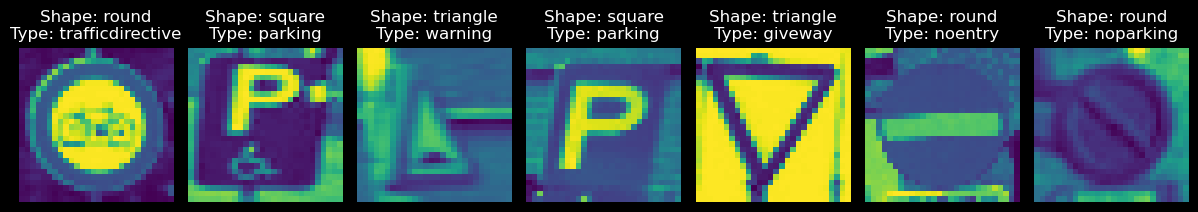

In [9]:
# Display a few randomly selected images with their labels
num_images = 7
random_indices = df.index.to_series().sample(num_images)

fig, axes = plt.subplots(1, num_images, figsize=(12, 4))

for i, idx in enumerate(random_indices):
    image_path = df.loc[idx, 'image_path']
    shape_label = shape_encoder.inverse_transform([df.loc[idx, 'shape_label']])[0]
    type_label = type_encoder.inverse_transform([df.loc[idx, 'type_label']])[0]
    
    image = Image.open(image_path)
    axes[i].imshow(image)
    axes[i].set_title(f"Shape: {shape_label}\nType: {type_label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [10]:
# Check if there are any duplicated rows in the DataFrame
has_duplicates = df.duplicated().any()

# Print out the result
print(f"DuplicateData: {has_duplicates}")

DuplicateData: False


Number of images in the training set: 2959
Number of images in the validation set: 740


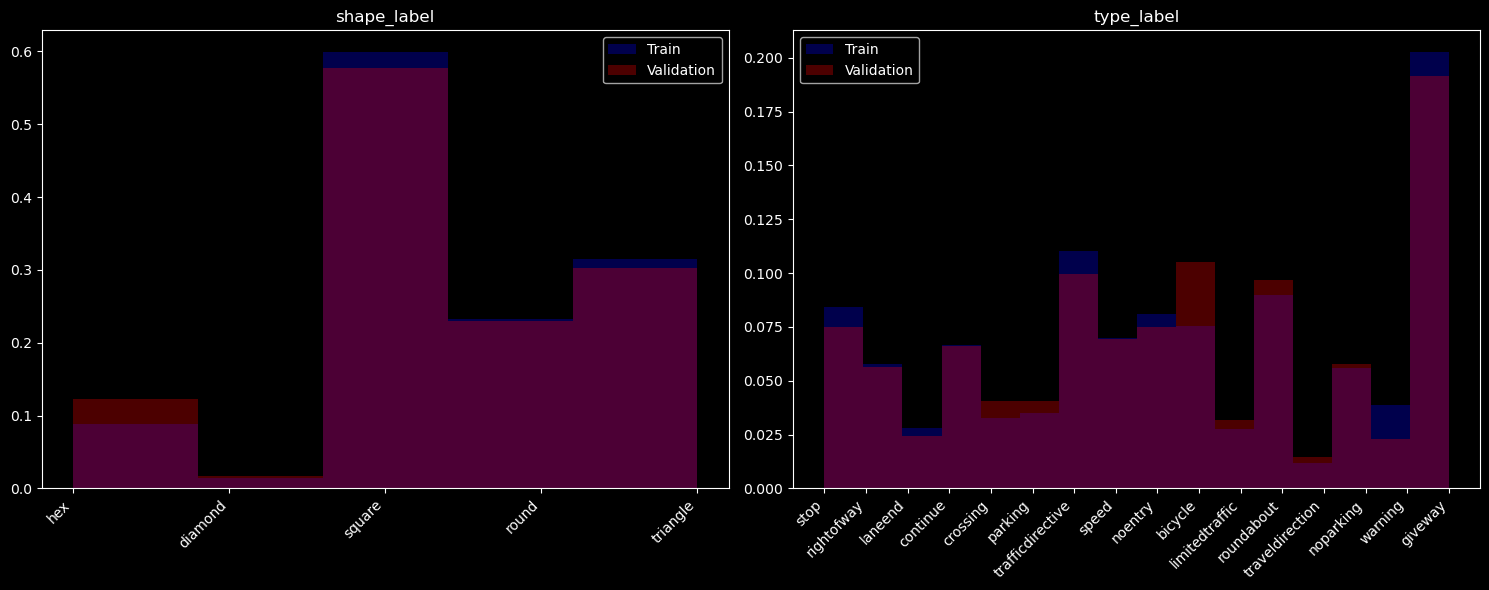

In [11]:
import matplotlib.pyplot as plt

# Split the data into train and validation sets
train_indices, val_indices = train_test_split(df.index, test_size=0.2, random_state=42)

# Print the number of items in each dataset
print("Number of images in the training set:", len(train_indices))
print("Number of images in the validation set:", len(val_indices))

# Create data generators for training and validation
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Get the unique labels for each column
shape_labels = shape_encoder.inverse_transform(df['shape_label'].unique())
type_labels = type_encoder.inverse_transform(df['type_label'].unique())

# Create a grid of subplots
plt.figure(figsize=(15, 6))
for i, col in enumerate(['shape_label', 'type_label']):
    plt.subplot(1, 2, i+1)
    if col == 'shape_label':
        unique_values = shape_labels
    else:
        unique_values = type_labels

    plt.hist(df.loc[train_indices, col], alpha=0.3, color='b', density=True,
             bins=len(unique_values), label='Train')
    plt.hist(df.loc[val_indices, col], alpha=0.3, color='r', density=True,
             bins=len(unique_values), label='Validation')
    plt.title(col)
    plt.xticks(range(len(unique_values)), unique_values, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()

plt.show()

In [12]:
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from PIL import Image

# Add a new column to the DataFrame with flattened image data as strings
df['image_data'] = df['image_path'].apply(lambda x: ' '.join(map(str, np.array(Image.open(x).resize((28, 28))).flatten())))

# Create the document-term matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['image_data'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# Print the topics
print("Topics:")
for topic_idx, topic in enumerate(lda.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-10 - 1:-1]]))

KeyboardInterrupt: 

In [13]:
# Load and preprocess the image data
def load_and_preprocess_image(image_path):
    img = imageio.imread(image_path)
    img = img / 255.0
    return img.flatten()

# Prepare the input data and labels
X_train = np.array([load_and_preprocess_image(image_path) for image_path in df.iloc[train_indices]['image_path']])
X_val = np.array([load_and_preprocess_image(image_path) for image_path in df.iloc[val_indices]['image_path']])

y_train_shape = df.iloc[train_indices]['shape_label'].values
y_train_type = df.iloc[train_indices]['type_label'].values
y_val_shape = df.iloc[val_indices]['shape_label'].values
y_val_type = df.iloc[val_indices]['type_label'].values

# Decision Tree

# from the shape then predict the type

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create Decision Tree classifiers for shape and type
shape_dt = DecisionTreeClassifier(random_state=42)
type_dt = DecisionTreeClassifier(random_state=42)

# Perform GridSearchCV for shape classifier
shape_grid_search = GridSearchCV(shape_dt, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
shape_grid_search.fit(X_train, y_train_shape)

# Perform GridSearchCV for type classifier
type_grid_search = GridSearchCV(type_dt, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
type_grid_search.fit(X_train, y_train_type)

# Print the best parameters for shape classifier
print("Best Parameters for Shape Classifier:")
print(shape_grid_search.best_params_)

# Print the best parameters for type classifier
print("Best Parameters for Type Classifier:")
print(type_grid_search.best_params_)

Best Parameters for Shape Classifier:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Parameters for Type Classifier:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


Shape Accuracy: 0.8635135135135135
Type Accuracy: 0.8364864864864865


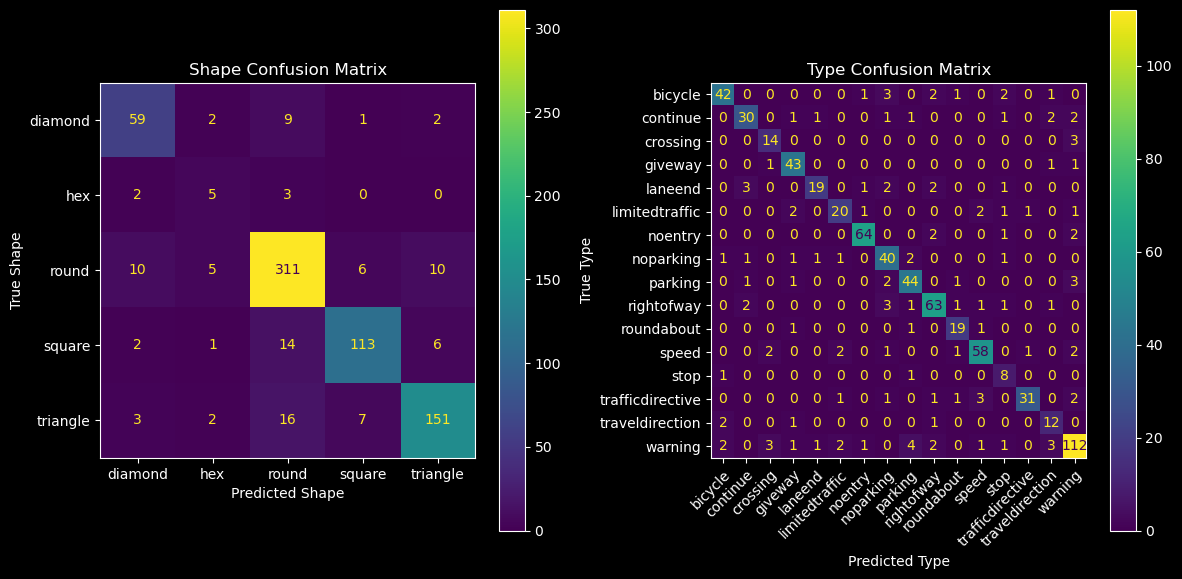

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the hypertuned Decision Tree classifiers with the best parameters
shape_dt_best = DecisionTreeClassifier(**shape_grid_search.best_params_, random_state=42)
type_dt_best = DecisionTreeClassifier(**type_grid_search.best_params_, random_state=42)

# Train the hypertuned Decision Tree classifiers
shape_dt_best.fit(X_train, y_train_shape)
type_dt_best.fit(X_train, y_train_type)

# Make predictions on the validation set
shape_pred = shape_dt_best.predict(X_val)
type_pred = type_dt_best.predict(X_val)

# Evaluate the hypertuned Decision Tree classifiers on the validation set
shape_acc = shape_dt_best.score(X_val, y_val_shape)
type_acc = type_dt_best.score(X_val, y_val_type)

print("Shape Accuracy:", shape_acc)
print("Type Accuracy:", type_acc)

# Create confusion matrices
shape_cm = confusion_matrix(y_val_shape, shape_pred)
type_cm = confusion_matrix(y_val_type, type_pred)

# Plot the confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ConfusionMatrixDisplay(shape_cm, display_labels=shape_encoder.classes_).plot(ax=ax1)
ax1.set_title("Shape Confusion Matrix")
ax1.set_xlabel("Predicted Shape")
ax1.set_ylabel("True Shape")

ConfusionMatrixDisplay(type_cm, display_labels=type_encoder.classes_).plot(ax=ax2)
ax2.set_title("Type Confusion Matrix")
ax2.set_xlabel("Predicted Type")
ax2.set_ylabel("True Type")

# Rotate the x-axis labels of the Type Confusion Matrix
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.tight_layout()
plt.show()

<div style="width:100%; text-align: center; padding: 20px; background-color: #333; border-radius: 10px;">
    <h1 style="color:#7D3C98; font-size: 36px;">Random Forest</h1>

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create Random Forest classifiers for shape and type
shape_rf = RandomForestClassifier(random_state=42)
type_rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV for shape classifier
shape_grid_search = GridSearchCV(shape_rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
shape_grid_search.fit(X_train, y_train_shape)

# Perform GridSearchCV for type classifier
type_grid_search = GridSearchCV(type_rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
type_grid_search.fit(X_train, y_train_type)

# Print the best parameters for shape classifier
print("Best Parameters for Shape Classifier:")
print(shape_grid_search.best_params_)

# Print the best parameters for type classifier
print("Best Parameters for Type Classifier:")
print(type_grid_search.best_params_)

Best Parameters for Shape Classifier:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Parameters for Type Classifier:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Shape Accuracy: 0.9540540540540541
Type Accuracy: 0.9594594594594594


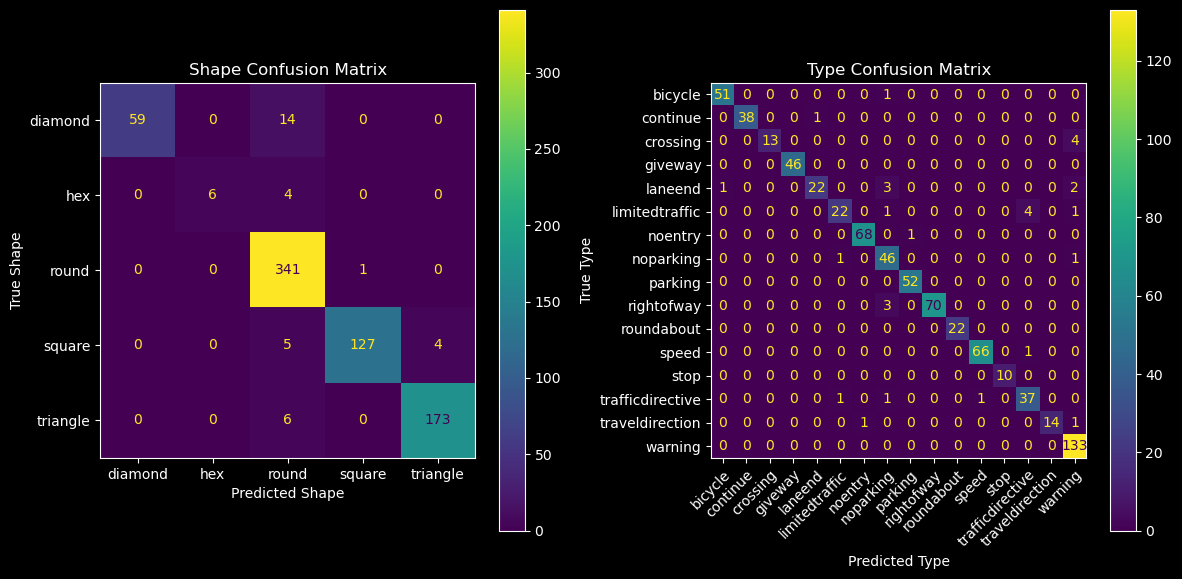

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the hypertuned Random Forest classifiers with the best parameters
shape_rf_best = RandomForestClassifier(**shape_grid_search.best_params_, random_state=42)
type_rf_best = RandomForestClassifier(**type_grid_search.best_params_, random_state=42)

# Train the hypertuned Random Forest classifiers
shape_rf_best.fit(X_train, y_train_shape)
type_rf_best.fit(X_train, y_train_type)

# Make predictions on the validation set
shape_pred = shape_rf_best.predict(X_val)
type_pred = type_rf_best.predict(X_val)

# Evaluate the hypertuned Random Forest classifiers on the validation set
shape_acc = shape_rf_best.score(X_val, y_val_shape)
type_acc = type_rf_best.score(X_val, y_val_type)

print("Shape Accuracy:", shape_acc)
print("Type Accuracy:", type_acc)

# Create confusion matrices
shape_cm = confusion_matrix(y_val_shape, shape_pred)
type_cm = confusion_matrix(y_val_type, type_pred)

# Plot the confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ConfusionMatrixDisplay(shape_cm, display_labels=shape_encoder.classes_).plot(ax=ax1)
ax1.set_title("Shape Confusion Matrix")
ax1.set_xlabel("Predicted Shape")
ax1.set_ylabel("True Shape")

ConfusionMatrixDisplay(type_cm, display_labels=type_encoder.classes_).plot(ax=ax2)
ax2.set_title("Type Confusion Matrix")
ax2.set_xlabel("Predicted Type")
ax2.set_ylabel("True Type")

# Rotate the x-axis labels of the Type Confusion Matrix
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.tight_layout()
plt.show()

<div style="width:100%; text-align: center; padding: 20px; background-color: #333; border-radius: 10px;">
    <h1 style="color:#7D3C98; font-size: 36px;">Ensemble</h1>

Shape Accuracy: 0.9540540540540541
Type Accuracy: 0.9567567567567568


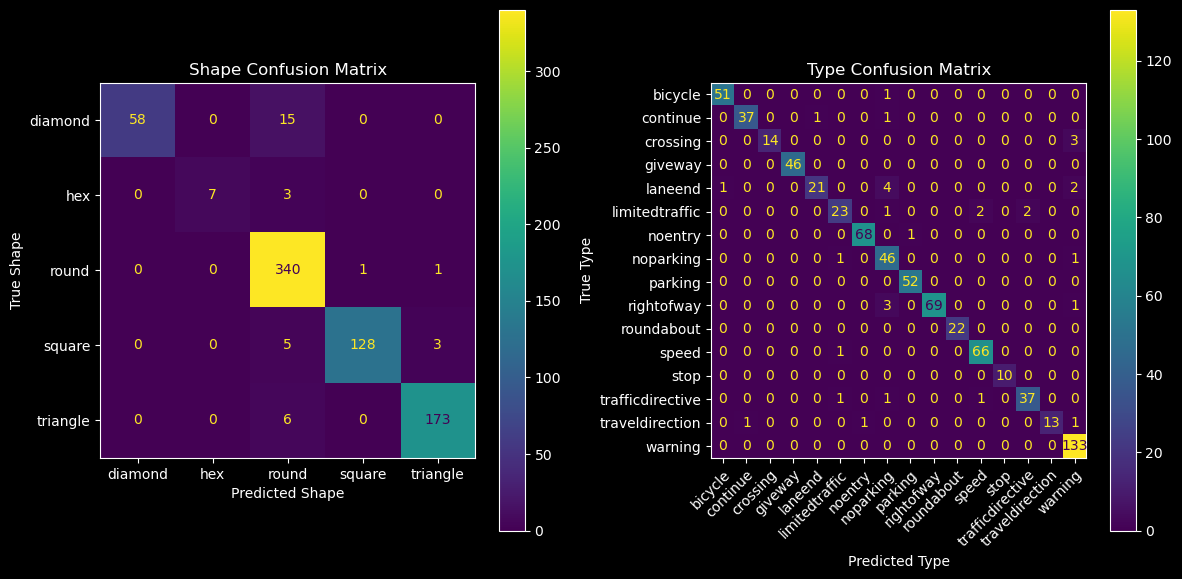

In [13]:
from sklearn.ensemble import VotingClassifier

# Create Random Forest classifiers for shape and type
shape_rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
shape_rf2 = RandomForestClassifier(n_estimators=100, random_state=43)
shape_rf3 = RandomForestClassifier(n_estimators=100, random_state=44)

type_rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
type_rf2 = RandomForestClassifier(n_estimators=100, random_state=43)
type_rf3 = RandomForestClassifier(n_estimators=100, random_state=44)

# Create the ensemble classifiers
shape_ensemble = VotingClassifier(estimators=[('rf1', shape_rf1), ('rf2', shape_rf2), ('rf3', shape_rf3)], voting='hard')
type_ensemble = VotingClassifier(estimators=[('rf1', type_rf1), ('rf2', type_rf2), ('rf3', type_rf3)], voting='hard')

# Train the ensemble classifiers
shape_ensemble.fit(X_train, y_train_shape)
type_ensemble.fit(X_train, y_train_type)

# Make predictions on the validation set
shape_pred = shape_ensemble.predict(X_val)
type_pred = type_ensemble.predict(X_val)

# Evaluate the ensemble classifiers on the validation set
shape_acc = shape_ensemble.score(X_val, y_val_shape)
type_acc = type_ensemble.score(X_val, y_val_type)

print("Shape Accuracy:", shape_acc)
print("Type Accuracy:", type_acc)

# Create confusion matrices
shape_cm = confusion_matrix(y_val_shape, shape_pred)
type_cm = confusion_matrix(y_val_type, type_pred)

# Plot the confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay(shape_cm, display_labels=shape_encoder.classes_).plot(ax=ax1)
ax1.set_title("Shape Confusion Matrix")
ax1.set_xlabel("Predicted Shape")
ax1.set_ylabel("True Shape")

ConfusionMatrixDisplay(type_cm, display_labels=type_encoder.classes_).plot(ax=ax2)
ax2.set_title("Type Confusion Matrix")
ax2.set_xlabel("Predicted Type")
ax2.set_ylabel("True Type")

# Rotate the x-axis labels of the Type Confusion Matrix
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.tight_layout()
plt.show()

<div style="width:100%; text-align: center; padding: 20px; background-color: #333; border-radius: 10px;">
    <h1 style="color:#7D3C98; font-size: 36px;">Neural Networks</h1>

In [43]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.models import Model
from keras.regularizers import l2
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

train_generator = train_datagen.flow_from_dataframe(
    dataframe=df.iloc[train_indices],
    x_col='image_path',
    y_col=['shape_label', 'type_label'],
    target_size=img_size,
    batch_size=32,
    class_mode='multi_output'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=df.iloc[val_indices],
    x_col='image_path',
    y_col=['shape_label', 'type_label'],
    target_size=img_size,
    batch_size=32,
    class_mode='multi_output'
)

# Define the input shape and number of classes
input_shape = (28, 28, 3)
num_shape_classes = len(shape_encoder.classes_)
num_type_classes = len(type_encoder.classes_)

# Create the model architecture
inputs = keras.Input(shape=input_shape)
x = Conv2D(16, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)

# Output layers for shape and type
shape_output = Dense(num_shape_classes, activation='softmax', name='shape')(x)
type_output = Dense(num_type_classes, activation='softmax', name='type')(x)

# Create the model
model = Model(inputs=inputs, outputs=[shape_output, type_output])

# Compile the model
model.compile(optimizer='adam',
              loss={'shape': 'sparse_categorical_crossentropy',
                    'type': 'sparse_categorical_crossentropy'},
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_indices) // 32,
    validation_data=val_generator,
    validation_steps=np.ceil(len(val_indices) / 32).astype(int),
    epochs=20
)

Found 2959 validated image filenames.
Found 740 validated image filenames.
Epoch 1/20


2024-04-28 23:20:52.142688: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


92/92 [==============================] - ETA: 0s - loss: 2.8568 - shape_loss: 0.9305 - type_loss: 1.9263 - shape_accuracy: 0.6594 - type_accuracy: 0.4493

2024-04-28 23:21:20.612321: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


92/92 [==============================] - 29s 311ms/step - loss: 2.8568 - shape_loss: 0.9305 - type_loss: 1.9263 - shape_accuracy: 0.6594 - type_accuracy: 0.4493 - val_loss: 1.7612 - val_shape_loss: 0.5447 - val_type_loss: 1.2165 - val_shape_accuracy: 0.8203 - val_type_accuracy: 0.6541
Epoch 2/20
92/92 [==============================] - 27s 300ms/step - loss: 0.9924 - shape_loss: 0.3176 - type_loss: 0.6748 - shape_accuracy: 0.9078 - type_accuracy: 0.8319 - val_loss: 0.6531 - val_shape_loss: 0.2174 - val_type_loss: 0.4357 - val_shape_accuracy: 0.9405 - val_type_accuracy: 0.8959
Epoch 3/20
92/92 [==============================] - 22s 240ms/step - loss: 0.4551 - shape_loss: 0.1459 - type_loss: 0.3092 - shape_accuracy: 0.9597 - type_accuracy: 0.9259 - val_loss: 0.4231 - val_shape_loss: 0.1341 - val_type_loss: 0.2890 - val_shape_accuracy: 0.9568 - val_type_accuracy: 0.9257
Epoch 4/20
92/92 [==============================] - 30s 322ms/step - loss: 0.2811 - shape_loss: 0.0815 - type_loss: 0.19

 8/24 [=========>....................] - ETA: 0s

2024-04-28 23:33:04.328320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


24/24 [==============================] - 0s 14ms/step


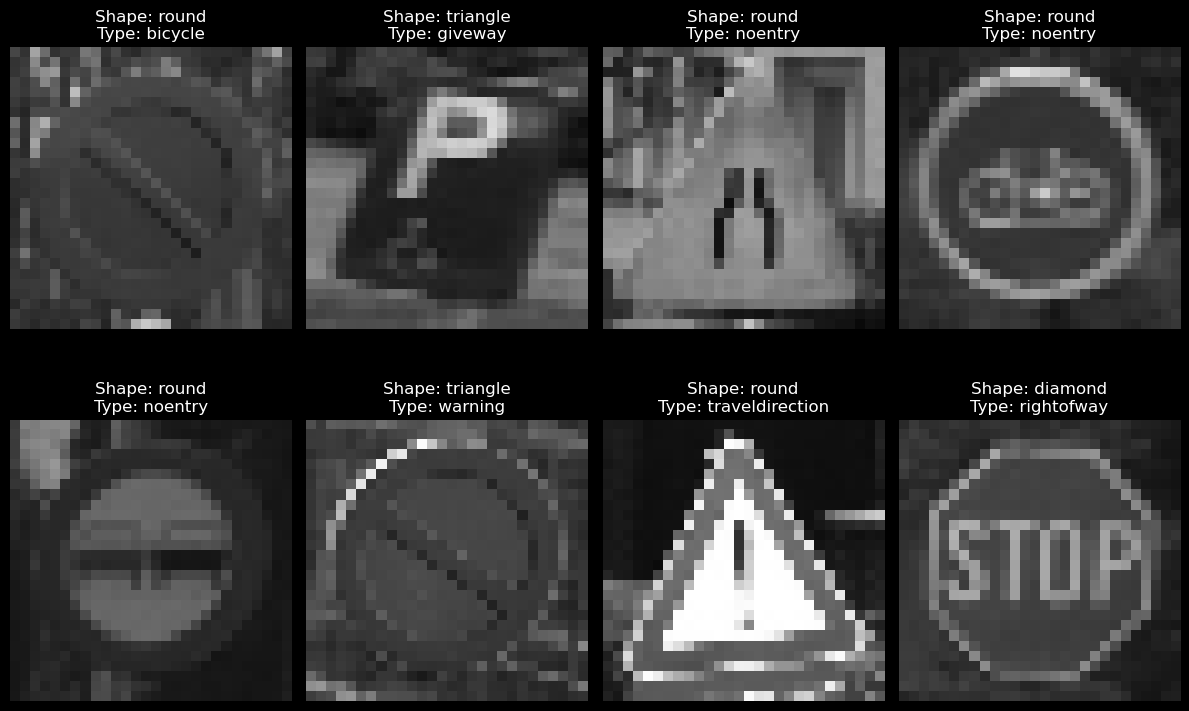

Predicted images visualized.
Confusion matrices created.


<Figure size 800x600 with 0 Axes>

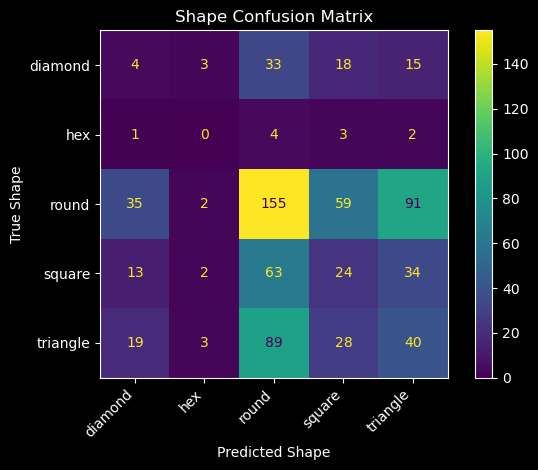

<Figure size 800x600 with 0 Axes>

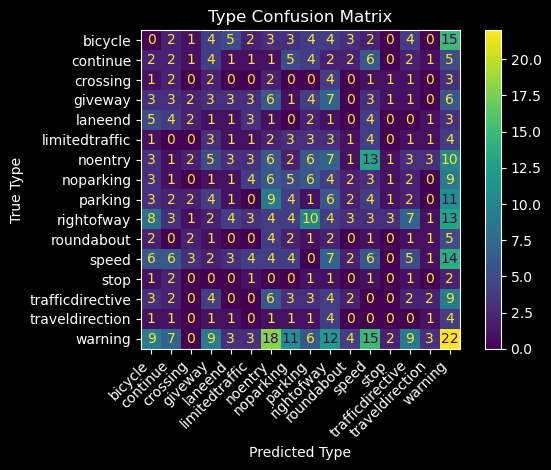

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions on the validation data
validation_steps = np.ceil(len(val_indices) / 32).astype(int)
val_preds = model.predict(val_generator, steps=validation_steps)
shape_preds = np.argmax(val_preds[0], axis=1)
type_preds = np.argmax(val_preds[1], axis=1)

# Get the true labels from the validation generator
shape_labels = val_generator.labels[0]
type_labels = val_generator.labels[1]

# Map the predicted labels back to their original names
shape_labels_map = {i: label for i, label in enumerate(shape_encoder.classes_)}
type_labels_map = {i: label for i, label in enumerate(type_encoder.classes_)}

# Visualize some predicted images
plt.figure(figsize=(12, 8))
for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    batch_index = i // 32  # Calculate the batch index
    sample_index = i % 32  # Calculate the sample index within the batch
    image = val_generator[batch_index][0][sample_index]
    image = (image * 255).astype('uint8')  # Convert the image back to the range [0, 255]
    plt.imshow(image)
    plt.title(f"Shape: {shape_labels_map[shape_preds[i]]}\nType: {type_labels_map[type_preds[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
print("Predicted images visualized.")

# Create confusion matrices for shape and type
shape_cm = confusion_matrix(shape_labels, shape_preds)
type_cm = confusion_matrix(type_labels, type_preds)
print("Confusion matrices created.")

# Plot the confusion matrix for shape
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(shape_cm, display_labels=shape_encoder.classes_).plot()
plt.title("Shape Confusion Matrix")
plt.xlabel("Predicted Shape")
plt.ylabel("True Shape")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Plot the confusion matrix for type
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(type_cm, display_labels=type_encoder.classes_).plot()
plt.title("Type Confusion Matrix")
plt.xlabel("Predicted Type")
plt.ylabel("True Type")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

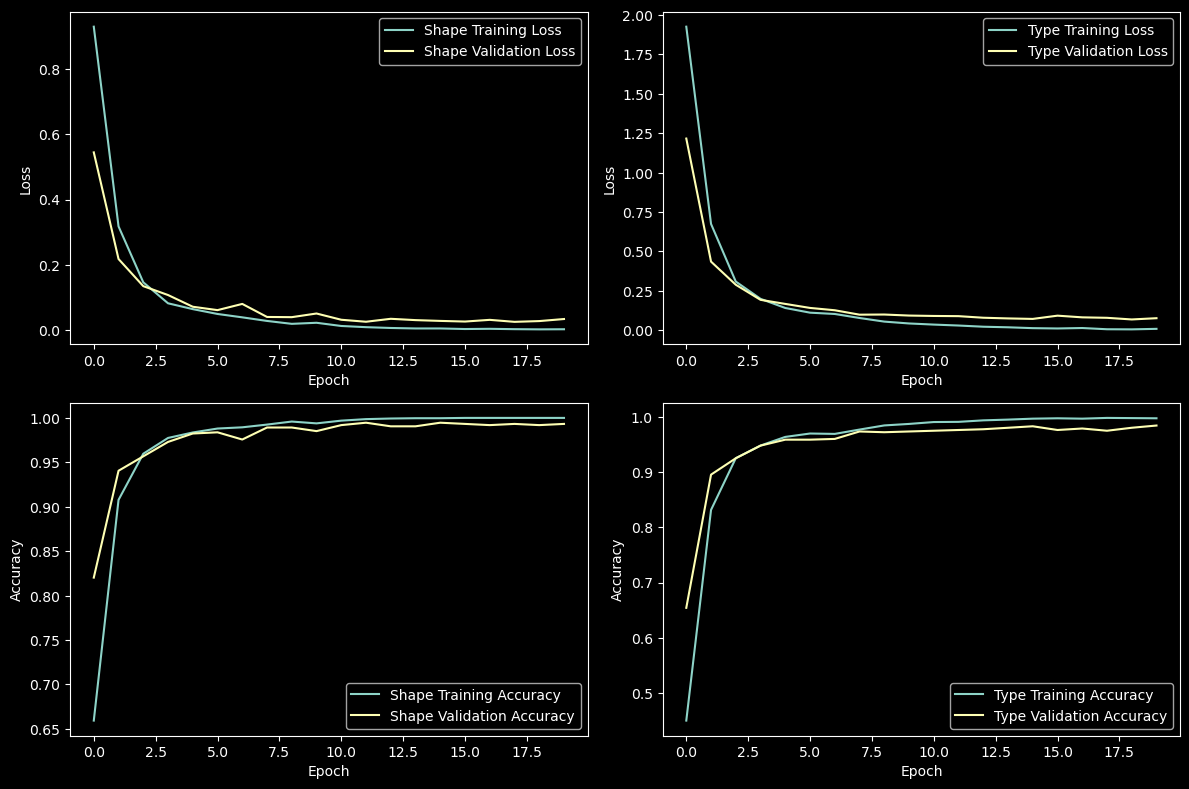

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Plot the learning curves
plt.figure(figsize=(12, 8))

# Plot loss curves
plt.subplot(2, 2, 1)
plt.plot(history.history['shape_loss'], label='Shape Training Loss')
plt.plot(history.history['val_shape_loss'], label='Shape Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history.history['type_loss'], label='Type Training Loss')
plt.plot(history.history['val_type_loss'], label='Type Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy curves
plt.subplot(2, 2, 3)
plt.plot(history.history['shape_accuracy'], label='Shape Training Accuracy')
plt.plot(history.history['val_shape_accuracy'], label='Shape Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(history.history['type_accuracy'], label='Type Training Accuracy')
plt.plot(history.history['val_type_accuracy'], label='Type Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [52]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix

# Generate predictions on the validation data
val_preds = model.predict(val_generator, steps=len(val_generator))
shape_preds = np.argmax(val_preds[0], axis=1)
type_preds = np.argmax(val_preds[1], axis=1)

# Get the true labels from the validation generator
shape_labels = val_generator.labels[0]
type_labels = val_generator.labels[1]

# Check the shapes of the labels and predictions
print("Shape Labels Shape:", shape_labels.shape)
print("Type Labels Shape:", type_labels.shape)
print("Shape Predictions Shape:", shape_preds.shape)
print("Type Predictions Shape:", type_preds.shape)

# Calculate the accuracy scores manually
shape_accuracy = accuracy_score(shape_labels, shape_preds)
type_accuracy = accuracy_score(type_labels, type_preds)

print("Manual Shape Accuracy:", shape_accuracy)
print("Manual Type Accuracy:", type_accuracy)

# Compare the manual accuracy scores with the validation accuracy reported during training
val_shape_accuracy = history.history['val_shape_accuracy'][-1]
val_type_accuracy = history.history['val_type_accuracy'][-1]

print("Validation Shape Accuracy (from training):", val_shape_accuracy)
print("Validation Type Accuracy (from training):", val_type_accuracy)

# Check if the manual accuracy scores match the validation accuracy from training
if abs(shape_accuracy - val_shape_accuracy) > 0.001:
    print("Shape accuracy mismatch! Difference:", abs(shape_accuracy - val_shape_accuracy))
else:
    print("Shape accuracy matches.")

if abs(type_accuracy - val_type_accuracy) > 0.001:
    print("Type accuracy mismatch! Difference:", abs(type_accuracy - val_type_accuracy))
else:
    print("Type accuracy matches.")

# Create confusion matrices for shape and type
shape_cm = confusion_matrix(shape_labels, shape_preds)
type_cm = confusion_matrix(type_labels, type_preds)

# Print the confusion matrices
print("Shape Confusion Matrix:")
print(shape_cm)
print("Type Confusion Matrix:")
print(type_cm)

2024-04-28 23:43:07.516033: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


24/24 [==============================] - 3s 132ms/step
Shape Labels Shape: (740,)
Type Labels Shape: (740,)
Shape Predictions Shape: (740,)
Type Predictions Shape: (740,)
Manual Shape Accuracy: 0.32837837837837835
Manual Type Accuracy: 0.0891891891891892
Validation Shape Accuracy (from training): 0.9932432174682617
Validation Type Accuracy (from training): 0.9851351380348206
Shape accuracy mismatch! Difference: 0.6648648390898834
Type accuracy mismatch! Difference: 0.8959459488456314
Shape Confusion Matrix:
[[  7   2  36  11  17]
 [  1   0   4   2   3]
 [ 33   5 167  63  74]
 [ 17   1  45  27  46]
 [ 14   2  92  29  42]]
Type Confusion Matrix:
[[ 1  2  1  1  1  1  7  5  5  5  1  6  2  2  1 11]
 [ 0  1  0  3  4  2  2  2  4  6  1  2  0  2  0 10]
 [ 1  2  0  1  0  0  3  1  1  3  0  1  0  0  0  4]
 [ 4  3  0  5  0  2  5  4  3  3  1  3  1  4  1  7]
 [ 1  2  0  3  1  0  2  3  0  3  0  3  1  1  0  8]
 [ 4  2  1  1  0  0  3  0  1  4  1  4  0  2  1  4]
 [ 3  3  1  5  3  4  8  3  5  6  1 12  0  

In [53]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 3)]  0           []                               
                                                                                                  
 conv2d_22 (Conv2D)             (None, 26, 26, 16)   448         ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_22 (MaxPooling2D  (None, 13, 13, 16)  0           ['conv2d_22[0][0]']              
 )                                                                                                
                                                                                                  
 conv2d_23 (Conv2D)             (None, 11, 11, 32)   4640        ['max_pooling2d_22[0][0]'] 

1/1 [==============================] - 0s 53ms/step
Predicted Shape: diamond
Predicted Type: bicycle


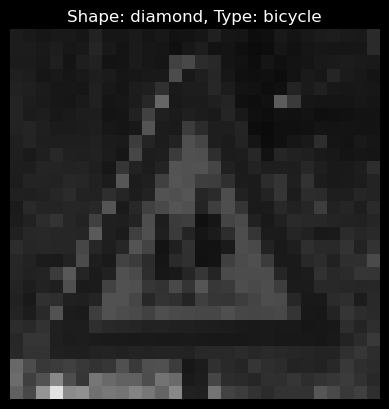

In [28]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Select a random image path from the validation set
random_index = np.random.choice(val_indices)
image_path = df.iloc[random_index]['image_path']

# Load and preprocess the image
img = image.load_img(image_path, target_size=img_size)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make predictions
shape_pred, type_pred = model.predict(x)

# Get the predicted shape and type labels
shape_label = shape_encoder.inverse_transform([np.argmax(shape_pred)])[0]
type_label = type_encoder.inverse_transform([np.argmax(type_pred)])[0]

# Print the predicted shape and type
print("Predicted Shape:", shape_label)
print("Predicted Type:", type_label)

# Display the tested image
plt.imshow(img)
plt.axis('off')
plt.title(f"Shape: {shape_label}, Type: {type_label}")
plt.show()

In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate predictions on the validation set
val_preds = model.predict(val_generator)

# Get the predicted labels for shape and type
shape_preds = np.argmax(val_preds[0], axis=1)
type_preds = np.argmax(val_preds[1], axis=1)

# Get the true labels for shape and type from the validation generator
val_labels = val_generator.labels
shape_labels = val_labels[:, 0]
type_labels = val_labels[:, 1]

# Create a dictionary to map the encoded labels back to their original names
shape_labels_map = {i: label for i, label in enumerate(shape_encoder.classes_)}
type_labels_map = {i: label for i, label in enumerate(type_encoder.classes_)}

# Visualize some predicted images
plt.figure(figsize=(12, 8))
for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    image = val_generator[i][0][0]
    image = (image * 255).astype('uint8')  # Convert the image back to the range [0, 255]
    plt.imshow(image)
    plt.title(f"Shape: {shape_labels_map[shape_preds[i]]}\nType: {type_labels_map[type_preds[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Create confusion matrices for shape and type
shape_cm = confusion_matrix(shape_labels, shape_preds)
type_cm = confusion_matrix(type_labels, type_preds)

# Plot the confusion matrices side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot confusion matrix for shape
ConfusionMatrixDisplay(shape_cm, display_labels=shape_encoder.classes_).plot(ax=ax1)
ax1.set_title("Shape Confusion Matrix")
ax1.set_xlabel("Predicted Shape")
ax1.set_ylabel("True Shape")

# Plot confusion matrix for type
ConfusionMatrixDisplay(type_cm, display_labels=type_encoder.classes_).plot(ax=ax2)
ax2.set_title("Type Confusion Matrix")
ax2.set_xlabel("Predicted Type")
ax2.set_ylabel("True Type")

# Rotate the x-axis labels of the Type Confusion Matrix
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

plt.tight_layout()
plt.show()

 9/24 [==========>...................] - ETA: 0s

2024-04-27 12:55:07.917700: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


24/24 [==============================] - 0s 17ms/step


TypeError: list indices must be integers or slices, not tuple

In [30]:
# Evaluate the model on the validation set
val_loss, val_shape_loss, val_type_loss, val_shape_acc, val_type_acc = model.evaluate(val_generator, steps=len(val_indices) // 32)

# Print the validation metrics
print("Validation Loss:", val_loss)
print("Validation Shape Loss:", val_shape_loss)
print("Validation Type Loss:", val_type_loss)
print("Validation Shape Accuracy:", val_shape_acc)
print("Validation Type Accuracy:", val_type_acc)

 8/23 [=========>....................] - ETA: 0s - loss: 0.0192 - shape_output_loss: 0.0055 - type_output_loss: 0.0137 - shape_output_accuracy: 0.9961 - type_output_accuracy: 0.9961   

2024-04-27 12:55:13.589981: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


23/23 [==============================] - 0s 16ms/step - loss: 0.0131 - shape_output_loss: 0.0039 - type_output_loss: 0.0092 - shape_output_accuracy: 0.9973 - type_output_accuracy: 0.9973
Validation Loss: 0.013112837448716164
Validation Shape Loss: 0.003938059322535992
Validation Type Loss: 0.009174778126180172
Validation Shape Accuracy: 0.9972826242446899
Validation Type Accuracy: 0.9972826242446899


In [ ]:
KNN & ISODATA & MAXIMUM-LIKELIHOOD, 

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools

# Prepare the ground truth labels
y_true_shape = []
y_true_type = []

for data in val_generator:
    y_batch_shape, y_batch_type = data[1][0], data[1][1]
    y_true_shape.extend(y_batch_shape)
    y_true_type.extend(y_batch_type)

y_true_shape = np.array(y_true_shape)
y_true_type = np.array(y_true_type)

# Compute the confusion matrices
shape_cm = confusion_matrix(y_true_shape, shape_preds)
type_cm = confusion_matrix(y_true_type, type_preds)

# Plot the confusion matrices
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, title):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot the shape confusion matrix
plot_confusion_matrix(shape_cm, shape_encoder.classes_, 'Shape Confusion Matrix')

# Plot the type confusion matrix
plot_confusion_matrix(type_cm, type_encoder.classes_, 'Type Confusion Matrix')

plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

# Prepare the data
X_train = []
y_train_shape = []
y_train_type = []

for data in train_generator:
    X_batch, y_batch_shape, y_batch_type = data[0], data[1][0], data[1][1]
    X_train.extend(X_batch)
    y_train_shape.extend(y_batch_shape)
    y_train_type.extend(y_batch_type)

X_train = np.array(X_train)
y_train_shape = np.array(y_train_shape)
y_train_type = np.array(y_train_type)

# Flatten the input images
X_train = X_train.reshape(X_train.shape[0], -1)

# Train the shape classifier
shape_classifier = GaussianMixture(n_components=len(shape_encoder.classes_), covariance_type='full')
shape_classifier.fit(X_train, y_train_shape)

# Train the type classifier
type_classifier = GaussianMixture(n_components=len(type_encoder.classes_), covariance_type='full')
type_classifier.fit(X_train, y_train_type)

# Prepare the ground truth labels and predictions
y_true_shape = []
y_true_type = []
y_pred_shape = []
y_pred_type = []

for data in val_generator:
    X_batch = data[0]
    y_batch_shape, y_batch_type = data[1][0], data[1][1]
    y_true_shape.extend(y_batch_shape)
    y_true_type.extend(y_batch_type)

    X_batch = X_batch.reshape(X_batch.shape[0], -1)
    shape_probs = shape_classifier.predict_proba(X_batch)
    shape_preds = shape_probs.argmax(axis=1)
    y_pred_shape.extend(shape_preds)

    type_probs = type_classifier.predict_proba(X_batch)
    type_preds = type_probs.argmax(axis=1)
    y_pred_type.extend(type_preds)

y_true_shape = np.array(y_true_shape)
y_true_type = np.array(y_true_type)
y_pred_shape = np.array(y_pred_shape)
y_pred_type = np.array(y_pred_type)

# Compute the confusion matrices
shape_cm = confusion_matrix(y_true_shape, y_pred_shape)
type_cm = confusion_matrix(y_true_type, y_pred_type)

# Plot the confusion matrices
def plot_confusion_matrix(cm, classes, title):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot the shape confusion matrix
plot_confusion_matrix(shape_cm, shape_encoder.classes_, 'Shape Confusion Matrix')

# Plot the type confusion matrix
plot_confusion_matrix(type_cm, type_encoder.classes_, 'Type Confusion Matrix')

plt.show()

<div style="width:100%; text-align: center; padding: 20px; background-color: #333; border-radius: 10px;">
    <h1 style="color:#7D3C98; font-size: 36px;">Independent Evaluation</h1>

In [ ]:
-BEST IDEA IS TO GATHER INCORRECT, AND CORRECT DATA TO TEST.
we used both the german sister dataset, and collected 200 of my own images
